# Transaction Value Prediction
In this notebook, we will tackle the challenge presented by Santander Group in terms of predicting "the value of transactions for each potential customer". In other words, the rgoup would provide an an anonymized dataset (for security purpose) to attain this objective. In essence, this presents a regression problem which we shall resolve using different machine learning techniques.

# Table of Contents
1. Environment set-up
    * Importing Libraries
    * Loading the data
2. Initial Diagnostics
    * Glimpse
    * Descriptive Statitics
    * Target Variable Analysis
3. Data Cleaning
    * Missing Values
    * Outliers
    * Duplicate Observations
4. Correlation Analysis
5. Machine Learning set-up
    * Feature Scaling
    * Train-test split
6. Machine Learning - Ensemble Methods
    * Random Forest Regressor
    * XGBoostRegressor
7. Hyperparameter Tuning
8. Model Performance Evaluation
9. Final Submission

# 1. Environment set-up

In [1]:
## Importing Libraries

#Set seed
import random
random.seed(69)

# Manipulating & Visualizing Data
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(12, 8)})

# Machine Learning set-up
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold

# Cross Validation
from sklearn.model_selection import  KFold

# Ensemble Learning
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Performance metrics
import sklearn.metrics as skm

In [2]:
## Loading the dataset
df = pd.read_csv(r"C:\Users\Akoua Orsot\Desktop\ds_projects_data\santander_transaction_value\train.csv")

#Removing the unnecessary ID column
df.drop("ID", axis=1, inplace=True)
df.head(10)

,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,38000000.0,0.0,0,0.0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,600000.0,0.0,0,0.0,0,0,0,0,0,2200000.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,10000000.0,0.0,0,0.0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,2000000.0,0.0,0,0.0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,14400000.0,0.0,0,0.0,0,0,0,0,0,2000000.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
5,2800000.0,0.0,0,0.0,0,0,0,0,0,17020000.0,...,12000.0,5600000.0,20000000.0,0,0,0,0,0,0,11000
6,164000.0,0.0,0,0.0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0,0,0,40000,0,0,0
7,600000.0,0.0,0,0.0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
8,979000.0,0.0,0,0.0,0,0,0,0,0,58000.0,...,0.0,0.0,4000000.0,0,0,0,0,0,0,0
9,460000.0,0.0,0,0.0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,400000


# 2. Initial Diagnostics

In [3]:
## Glimpse of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Columns: 4992 entries, target to 9fc776466
dtypes: float64(1845), int64(3147)
memory usage: 169.8 MB


In [4]:
## Descriptive Statistics
df.describe()

,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
count,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,...,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4459.000000,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03
mean,5.944923e+06,1.465493e+04,1.390895e+03,2.672245e+04,4.530164e+03,2.640996e+04,3.070811e+04,1.686522e+04,4.669208e+03,2.569407e+06,...,4.676057e+05,4.446239e+05,8.056219e+05,7.812966e+05,143.529939,1.213809e+05,3.573451e+04,3.123741e+05,9.219960e+04,2.279100e+05
std,8.234312e+06,3.893298e+05,6.428302e+04,5.699652e+05,2.359124e+05,1.514730e+06,5.770590e+05,7.512756e+05,1.879449e+05,9.610183e+06,...,4.068038e+06,4.428889e+06,4.513246e+06,6.839451e+06,9584.318507,4.720709e+06,1.614622e+06,4.318501e+06,1.635993e+06,1.811139e+06
min,3.000000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.260000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+05,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,4.000000e+07,2.000000e+07,4.000000e+06,2.000000e+07,1.480000e+07,1.000000e+08,2.070800e+07,4.000000e+07,1.040000e+07,3.196120e+08,...,7.600000e+07,1.235880e+08,1.300000e+08,1.444000e+08,640000.000000,3.013120e+08,1.064200e+08,1.400000e+08,6.176800e+07,4.320000e+07


**Note:** The histogram below shows a right-skewed distribution indicating that most transactions are on the lower end. It remains consistent given that banking transaction for x person (on average) is relatively modest, with some expectations on the upper tail as shown with the outliers on the boxplot below.  

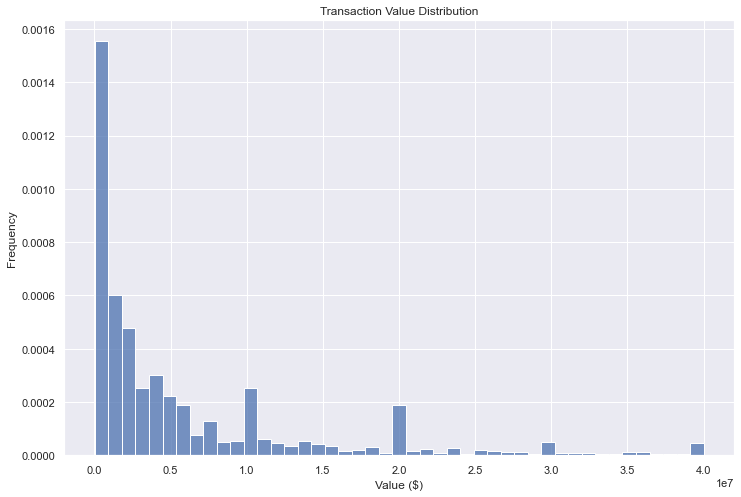

In [5]:
## Target Variable Analysis
sns.histplot(data=df, x='target', stat='frequency')
plt.title("Transaction Value Distribution")
plt.xlabel("Value ($)")
plt.show()

**Note:** As noted in the introduction, we have an anonymized dataset with all predictors standardized. Thus, we would have minimal insights in exploring them individually. 

# 3. Data Cleaning

In [6]:
# Missing Values
df.isna().sum().sum()

0

**Takeaway:** With the data already formatted and standardized, we expect no null values.

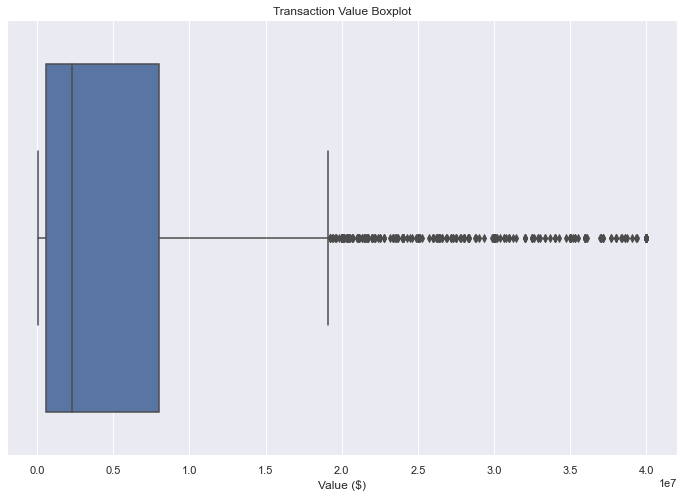

In [7]:
## Outliers
sns.boxplot(data=df, x='target')
plt.title("Transaction Value Boxplot")
plt.xlabel("Value ($)")
plt.show()

**Takeaway:** From the box plot above, We have already determined some outliers. However, we will not exclude them but use other techniques instead to ensure robust results from the machine learning predictions.

In [8]:
# Duplicate Observations
df.duplicated().value_counts()

False    4459
dtype: int64

**Takeaway:**  With no duplicate values, we may proceed without making any further changes.

In [9]:
# Unsual Values
(df['target'].values < 0).any()

False

# 4. Correlation Analysis

**Takeaway:** Given that we have close to 5000 columns, it would be quite computationally intensive to display the entire correlation matrix and visualize it for user-friendly analysis. 

# 5. Machine Learning set-up

Under this section, we will explain the procedure of two main splitting approach to estimate our models' performance. 

In [10]:
# Splitting features & target variable
X = df.drop(['target'], axis=1).values
y = df['target'].values

**Definition:** As we may imagine, variables come in different measurements like height in inches, weight in pounds, or dollar amount. To ensure a smooth run of our models, we will proceed with feature scaling by representing every value in the column based on a given reference. In our instance, we will use **StandardScaler** by subtracting from the mean and dividing by the standard deviation.

In [11]:
# scaler = preprocessing.StandardScaler()
# X = scaler.fit_transform(X)
# X

**Definition:** Often denoted as the most popular by its simplicity, the train-test split is a sampling technique dividing the dataset between training and testing sets. In doing so, the goal would be to have enough (but not too much) in our training set used for the machine learning model to predict the observations in the testing set as accurately as possible. Most would opt for a 70/30 training-testing split, respectively, others 80/20, 60/40, or whichever else works best for the case scenario. Further information [here](https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/). 

In [12]:
## Training Testing Split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)


# 6. Machine Learning - Ensemble Methods

This section will extend our work in machine learning to incorporate ensemble methods. We generated simple models and compared the scores, which appear satisfactory, with the lowest at 0.974 for the Average Precision Score. However, we may want more stability and minor variation in our predictive algorithm; it is where ensemble techniques come in. Most often, they act as a 'superposer' of multiple models throughout various ways and thus, bolster their predictive power. Further Information [here](https://machinelearningmastery.com/tour-of-ensemble-learning-algorithms/). 

In [13]:
# Dictionary to store ensemble model structures
ensemble_models = dict()

**Definition:** Random Forest builds onto the logic of decision trees by agglomerating multiple trees and obtaining a given value prediction using averaging all output. Further information [here](https://towardsdatascience.com/understanding-random-forest-58381e0602d2).

In [14]:
## Random Forest
rf_reg = RandomForestRegressor(n_estimators=10)
ensemble_models.update({'Random Forest Regressor':rf_reg})

**Definition:** AdaBoostRegressor...

In [15]:
## AdaBoost
ada_reg = GradientBoostingRegressor(n_estimators=10)
ensemble_models.update({'AdaBoostRegressor': ada_reg})

In [16]:
ensemble_models

{'Random Forest Regressor': RandomForestRegressor(n_estimators=10),
 'AdaBoostRegressor': AdaBoostRegressor(n_estimators=10)}

In [17]:
# Model Building & performance evaluation
kf = KFold(n_splits=3)
kf.get_n_splits(X_train)

for name, model in ensemble_models.items():
    model_errs = []
    for train_index, test_index in kf.split(X_train):
        X_train_k = X_train[train_index] 
        y_train_k = y_train[train_index]
        model.fit(X_train_k, y_train_k)
        pred = model.predict(X_train_k)
        nonneg_pred = np.clip(pred, df['target'].min(), df['target'].max())
        rmse = skm.mean_squared_error(y_train_k, nonneg_pred, squared=False) 
        model_errs.append(rmse)
        # report performance
    print('{} - RMSE: {:.5f} ({:.5f})' .format(name, np.mean(model_errs), 
                                               np.std(model_errs)))

Random Forest Regressor - RMSE: 3269543.41325 (68886.72087)
AdaBoostRegressor - RMSE: 8528898.17912 (161358.96390)


**Takeaway:** Moving forward, we will perform hyperparameter tuning and evaluate the performance of the best model, that is the Random Forest Regressor.

In [19]:
# model = RandomForestRegressor(n_estimators=100)
# model.fit(X_train, y_train)
# pred = model.predict(X_valid)
# nonneg_pred = np.clip(pred, df['target'].min(), df['target'].max())
# rmse = skm.mean_squared_error(y_valid, nonneg_pred, squared=False)
# rmse

# 7. Hyperparameter Tuning

In [ ]:
# Define model
# rf = RandomForestRegressor()

# # Define the paramters 
# n_estimators = list(range(50, 301, 50))
# max_features = ['auto', 'sqrt']
# max_depth = list(range(5, 31, 5))
# max_depth.append(None)
# min_samples_split = [2, 5, 10]
# min_samples_leaf = [1, 2, 4]
# bootstrap = [True, False]

# # Create the search space
# search_space = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}

# search_space

In [ ]:
# Random Search
# search = RandomizedSearchCV(estimator = rf, param_distributions = search_space, 
#                             n_iter = 2, cv = 5, verbose=0, n_jobs = -1,
#                             scoring= 'neg_root_mean_squared_error')

# # Return best parameters
# rf_random = search.fit(X_train, y_train)
# best_params = rf_random.best_params_ 
# print(best_params)

In [ ]:
# pred = rf_random.predict(X_train)
# nonneg_pred = np.clip(pred, df['target'].min(), df['target'].max())
# rmse = skm.mean_squared_error(y_train, nonneg_pred, squared=False) 
# print('Random Search Best RF Regressor Model - RMSE: {:.5f}' .format(rmse))
# print('with the following best parameters: \n {}' .format(best_params))

In [ ]:
# Grid Search
# search = GridSearchCV(estimator = rf, param_grid = search_space, 
#                        cv=3, scoring= 'neg_root_mean_squared_error',
#                        verbose=0, n_jobs = -1)
# rf_grid = search.fit(X_train, y_train)
# best_params = rf_grid.best_params_ 

In [ ]:
# pred = rf_random.predict(X_train)
# nonneg_pred = np.clip(pred, df['target'].min(), df['target'].max())
# rmse = skm.mean_squared_error(y_train, nonneg_pred, squared=False) 
# print('Random Search Best RF Regressor Model - RMSE: {:.5f}' .format(rmse))
# print('with the following best parameters: \n {}' .format(best_params))

# 9. Final Submission

In [20]:
## Loading the dataset
test_df = pd.read_csv(r"C:\Users\Akoua Orsot\Desktop\ds_projects_data\santander_transaction_value\test.csv")
ids = test_df['ID']
test_df.drop(['ID'], axis=1, inplace=True)

In [21]:
# Defining our orignal model
final_model = RandomForestRegressor(n_estimators=10)
final_model.fit(X, y)
pred = final_model.predict(test_df)
nonneg_pred = np.clip(pred, df['target'].min(), df['target'].max())
sub = pd.DataFrame({'ID': ids, 'target': nonneg_pred})
sub.to_csv('submission.csv', index=False)

C:\Users\Akoua Orsot\Anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
